In [72]:
import scipy
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd 
import seaborn
import numpy as np

In [73]:
data = pd.read_csv("in.csv")
data.head(data.size)

,x,y,y'
0,0.00,1.000000,-1.00000
1,0.15,0.838771,-1.14944
2,0.30,0.655336,-1.29552
3,0.45,0.450447,-1.43497
4,0.60,0.225336,-1.56464
5,0.75,-0.018310,-1.68164
6,0.90,-0.278390,-1.78333
7,1.05,-0.552430,-1.86742


In [74]:
x = data['x'].values
y = data['y'].values
yDer = data["y'"].values
print(x,'\n', y,'\n', yDer)

[0.   0.15 0.3  0.45 0.6  0.75 0.9  1.05] 
 [ 1.        0.838771  0.655336  0.450447  0.225336 -0.01831  -0.27839
 -0.55243 ] 
 [-1.      -1.14944 -1.29552 -1.43497 -1.56464 -1.68164 -1.78333 -1.86742]


In [75]:
with open('in.txt') as f:
    xMean = float(f.readline())
print(xMean)

0.525


In [76]:
def getNearCoef(arr, xMean):
    for i in range(len(arr)):
        if arr[i] > xMean:
            return i

def getFirstColumnTable(arr, n, coef):
    if n % 2 == 0:
        arr = arr[coef - n // 2: coef + n // 2]
    elif n % 2 == 1:
        arr = arr[coef - n // 2: coef + n // 2 + 1]
    return arr

In [77]:
coef = getNearCoef(x, xMean)
xCopy = getFirstColumnTable(x, 2, coef)
print(xCopy)

[0.45 0.6 ]


In [78]:
def getDivededDiff(x, y, n):
    table = np.zeros([n, n])
    table[:,0] = y
    for j in range(1, n):
        for i in range(n - j):
            table[i][j] = (table[i + 1][j - 1] - table[i][j - 1]) / (x[i + j] - x[i])
    return table

def getNewtonPoly(table, x, xMean, n):
    yx = table[0]
    p = xMean - x[0]
    for i in range(1, n):
        yx += table[i] * p
        p *= xMean - x[i]
    return yx


In [79]:
results = np.zeros((5, 2))
coef = getNearCoef(x, xMean)
for n in range(2, 7):
    xCopy = getFirstColumnTable(x, n, coef)
    yCopy = getFirstColumnTable(y, n, coef)
    table = getDivededDiff(xCopy, yCopy, n)[0, :]
    results[n - 2][0] = getNewtonPoly(table, xCopy, xMean, n)

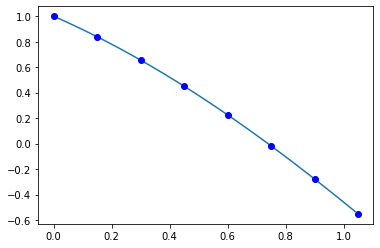

In [80]:
n = 8
xGraph = np.arange(x[0], x[7], 0.01)
yGraph = np.zeros(xGraph.size)
for i in range(xGraph.size):
    table = getDivededDiff(x, y, n)[0, :]
    yGraph[i] = getNewtonPoly(table, x, xGraph[i], n)
plt.plot(xGraph, yGraph)
plt.plot(x, y, 'bo')

In [81]:
def makeThirdColumnTable(x, y, yDer, n):
    table = np.zeros([2 * n, 2 * n + 1])
    for i in range(n):
        table[2 * i][0] = x[i]
        table[2 * i + 1][0] = x[i]
        table[2 * i][1] = y[i]
        table[2 * i + 1][1] = y[i]
        table[2 * i][2] = yDer[i]
        table[2 * i + 1][2] = (y[i] - y[i + 1]) / (x[i] - x[i + 1])
    return table

In [82]:
def makeTable(table, n, x):
    for j in range(3, n):
        for i in range(n - j):
            table[i][j] = (table[i][j - 1] - table[i + 1][j - 1]) / (table[i][0] - table[i + 2][0])
    data = pd.DataFrame(data=table)
    return table

In [83]:
def getHermPoly(table, x, xMean, n):
    yx = table[1]
    p = xMean - x[0]
    for i in range(1, n):
        yx += table[i + 1] * p
        p *= xMean - x[i // 2]
    return yx

In [84]:
coef = getNearCoef(x, xMean)
for n in range(1, 4):
    nHerm = 2 * n
    coef = getNearCoef(x, xMean)
    xCopy = getFirstColumnTable(x, n + 1, coef)
    yCopy = getFirstColumnTable(y, n + 1, coef)
    yDerCopy = getFirstColumnTable(yDer, n, coef - 1)
    table = makeThirdColumnTable(xCopy, yCopy, yDerCopy, n)
    table = makeTable(table, nHerm + 1, xCopy)[0, :]
    results[n][1] = getHermPoly(table, xCopy, xMean, nHerm)
    print(results[n][1])


0.34282424999999994
0.34050618749999995
0.3406127499999999


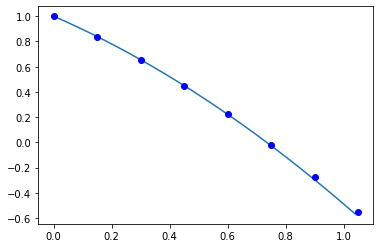

In [85]:
n = 4
xGraph = np.arange(x[0], x[7], 0.01)
yGraph = np.zeros(xGraph.size)
for i in range(xGraph.size):
    table = makeThirdColumnTable(x, y, yDer, n)
    table = makeTable(table, nHerm + 1, xCopy)[0, :]
    yGraph[i] = getHermPoly(table, x, xGraph[i], n)
plt.plot(xGraph, yGraph)
plt.plot(x, y, 'bo')

In [86]:
n = 8 
coef = getDivededDiff(y, x, n)[0, :]
yData = getNewtonPoly(coef, y, 0, n)
print(yData)

0.7390848337168541


In [87]:
table = pd.DataFrame(data=results, columns=["Ньютон", "Эрмит"])
print(table)

     Ньютон     Эрмит
0  0.337891  0.000000
1  0.340208  0.342824
2  0.340314  0.340506
3  0.340324  0.340613
4  0.340324  0.000000
